In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [27]:
# load dataset
df = pd.read_csv("male(final).csv")
df

,gender,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,...,like_o,prob_o,met_o,age,field_cd,race,imprace,career_c,income,dec_o
0,1,0,21,4,15.00,20.00,20.00,15.00,15.00,15.00,...,7.0,6.0,1,27,8,2,7,2,63800.92764,1
1,1,1,24,2,45.00,5.00,25.00,20.00,0.00,5.00,...,6.0,4.0,1,27,8,2,7,2,25787.29081,0
2,1,1,25,2,35.00,10.00,35.00,10.00,10.00,0.00,...,8.0,7.0,0,27,8,2,7,2,63477.32534,0
3,1,1,23,2,20.00,20.00,20.00,20.00,10.00,10.00,...,6.0,7.0,1,27,8,2,7,2,53655.55468,0
4,1,1,21,2,20.00,5.00,25.00,25.00,10.00,15.00,...,7.0,5.0,1,27,8,2,7,2,35955.51109,0
5,1,0,23,4,10.00,25.00,20.00,25.00,5.00,15.00,...,6.0,6.0,1,27,8,2,7,2,40231.42441,1
6,1,0,22,4,15.00,15.00,25.00,20.00,15.00,10.00,...,7.0,4.0,1,27,8,2,7,2,56789.23268,0
7,1,1,25,2,9.09,18.18,27.27,18.18,18.18,9.09,...,4.0,5.0,1,27,8,2,7,2,49721.07326,1
8,1,0,26,6,20.00,10.00,20.00,30.00,10.00,10.00,...,5.0,5.0,1,27,8,2,7,2,44274.30343,1
9,1,1,26,2,15.00,15.00,15.00,40.00,10.00,5.00,...,6.0,3.0,1,27,8,2,7,2,54470.35529,0


In [34]:
#split dataset in features and target variable
#feature_cols = ['match', 'samerace', 'age_o', 'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','age','field_cd','imprace'
#               ,'imprelig', 'career_c']
feature_cols = df.iloc[1:, 1:25]
target_col = df.iloc[1:, -1]
X = feature_cols # Features
y = target_col # Target variable

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [36]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [37]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7611548556430446


### This part is for printing the yes/no thingy

In [38]:
import pandas as pd
import numpy as np
import pylab as plt

In [39]:
testX = X_test
pred = y_pred
testY = y_test
x = pd.DataFrame(data=testX, columns=['samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o',
       'shar_o', 'amb_o', 'fun_o', 'intel_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field_cd', 'race', 'imprace', 'career_c', 'income'])

x_unscale = x.loc[:, "attr_o":"like_o"].apply(lambda x: x)
del x['race_o']

y_p = pd.DataFrame(data=pred, columns=['dec_m'])
y_a = pd.DataFrame(data=testY.tolist(), columns=['dec_a'])

In [40]:
df_full = pd.merge(x_unscale, y_p, left_index=True, right_index=True)
df_actual = pd.merge(x_unscale, y_a, left_index=True, right_index=True)

yes_model = df_full[df_full.dec_m == 1]
no_model = df_full[df_full.dec_m == 0]

yes_actual = df_actual[df_actual.dec_a == 1]
no_actual = df_actual[df_actual.dec_a == 0]

yes_model_mean = yes_model.groupby('dec_m').mean().loc[:,"attr_o":"like_o"]
yes_actual_mean = yes_actual.groupby('dec_a').mean().loc[:,"attr_o":"like_o"]


no_model_mean = no_model.groupby('dec_m').mean().loc[:,"attr_o":"like_o"]
no_actual_mean = no_actual.groupby('dec_a').mean().loc[:,"attr_o":"like_o"]

In [21]:
x_unscale.columns

Index([], dtype='object')

In [17]:
x_unscale_array = x_unscale.values

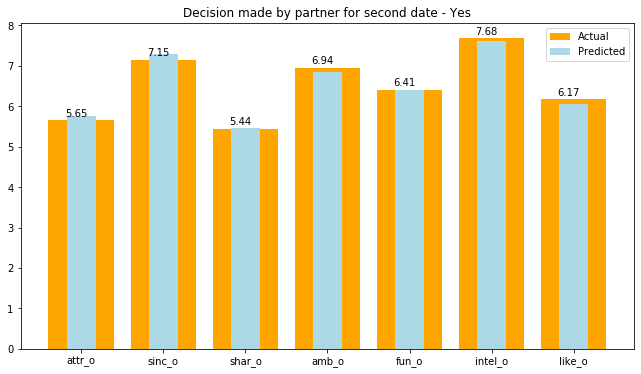

In [41]:
l = ['attr_o', 'sinc_o',
       'shar_o', 'amb_o', 'fun_o', 'intel_o', 'like_o']


fig, ax = plt.subplots(figsize=(11,6))

ax.bar(l, yes_actual_mean.values[0], color='orange', label='Actual')
ax.bar(l, yes_model_mean.values[0], color='lightblue', width=0.35, label='Predicted')
ax.legend()
diff = [yes_actual_mean.values[0][i]-yes_model_mean.values[0][i] for i in range(len(yes_actual_mean.values[0]))]

i =0

for x1,y1 in enumerate(yes_actual_mean.values[0]):
#     ax.text(x1-0.2,y1+0.1, "+%.2f"%diff[i], color= "black")
    ax.text(x1-0.2,y1+0.1, "%.2f"%y1, color= "black")
    i+=1
    
plt.title("Decision made by partner for second date - Yes")    
plt.savefig('yes-dt.jpg')
plt.show()


<Figure size 432x288 with 0 Axes>

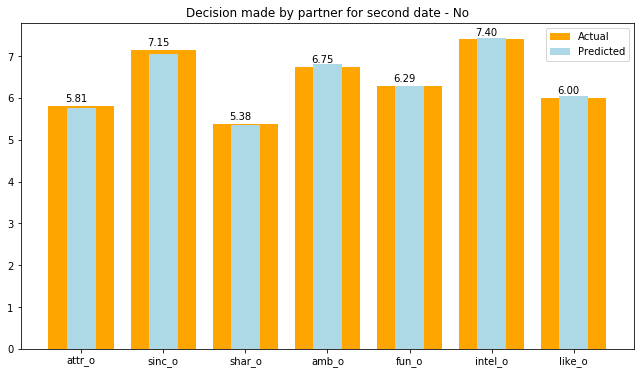

In [42]:
l = ['attr_o', 'sinc_o',
       'shar_o', 'amb_o', 'fun_o', 'intel_o', 'like_o']

plt.clf()
fig, ax = plt.subplots(figsize=(11,6))

ax.bar(l, no_actual_mean.values[0], color='orange', label='Actual')
ax.bar(l, no_model_mean.values[0], color='lightblue', width=0.35, label='Predicted')
ax.legend()
diff = [no_actual_mean.values[0][i]-no_model_mean.values[0][i] for i in range(len(no_actual_mean.values[0]))]

i =0

for x1,y1 in enumerate(no_actual_mean.values[0]):
#     ax.text(x1-0.2,y1+0.1, "%.2f"%diff[i], color= "black")
    ax.text(x1-0.2,y1+0.1, "%.2f"%y1, color= "black")
    i+=1
    
plt.title("Decision made by partner for second date - No")    
plt.savefig('no-dt.jpg')
plt.show()